# Web scrapping

Szymon Dziubak

Jeżeli chcemy pobrać dane z jakiejś strony internetowej to przede wszystkim powinniśmy sprawdzić, czy nie istnieje API, które te dane udostępnia. <br>
Jeżeli sprawdziliśmy, że API nie ma (a część stron internetowych i portali takie API ma, np. GUS, Facebook, Twitter, Allegro itd.) to możemy odwołać się do kodu HTML strony internetowej, żeby zeskrobać dane.

W pythonie istnieje biblioteka Beautiful Soup, która umożliwia skrobanie danych. Działa następująco:
1. Wysyamy zapytanie do strony internetowej i w odpowiedzi otrzymujemy kod HTML.
2. Parsujemy kod HTML - przetwarzamy go w ten sposób, aby uzyskać aby był on gotowy do przetworzenia.
3. Nawigujemy do interesujących nas elementów czyli do danych zawartych w kodzie HTML.

In [119]:
#!pip install requests
#!pip install html5lib
#!pip install bs4

In [120]:
#pobieramy dane ze strony internetowej

import requests
url = "https://www.onet.pl/"
r = requests.get(url)
print(r.content)

b'<!DOCTYPE html><html lang="pl" class="device-bot"><head><meta charset="utf-8"><link rel="canonical" href="https://www.onet.pl"><link rel="preload" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Regular.woff2" as="font" type="font/woff2" crossorigin="anonymous"><link rel="preload" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Medium.woff2" as="font" type="font/woff2" crossorigin="anonymous"><link rel="preload" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Bold.woff2" as="font" type="font/woff2" crossorigin="anonymous"><link rel="preload" href="https://ocdn.eu/onetmobilemainpage/icofont/i34/onetsg.woff2" as="font" type="font/woff2" crossorigin="anonymous"><link rel="preload" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Bold-Cyrillic.woff2" as="font" type="font/woff2" crossorigin="anonymous"><script id="InlineScript-polyfills">(function () {\n          /* eslint-disable */\n          function getLocalStoragePolyfill

In [121]:
#parsujemy html - tworzymy strukture

from bs4 import BeautifulSoup
  
url = "https://www.onet.pl/"
r = requests.get(url) #wysyłamy zapytanie do strony
soup = BeautifulSoup(r.content, 'html5lib') # parser, html5lib bo mamy plik html
print(soup.prettify()) #ładne wyświetlenie 

<!DOCTYPE html>
<html class="device-bot" lang="pl">
 <head>
  <meta charset="utf-8"/>
  <link href="https://www.onet.pl" rel="canonical"/>
  <link as="font" crossorigin="anonymous" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Medium.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Bold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://ocdn.eu/onetmobilemainpage/icofont/i34/onetsg.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://ocdn.eu/onetmobilemainpage/firafonts/p06/FiraSans-Bold-Cyrillic.woff2" rel="preload" type="font/woff2"/>
  <script id="InlineScript-polyfills">
   (function () {
          /* eslint-disable */
        

In [122]:
#scrappujemy dane
import requests
from bs4 import BeautifulSoup
   
url = "https://www.filmweb.pl/film/Narodziny+gwiazdy-2018-542576"
r = requests.get(url)
   
soup = BeautifulSoup(r.content, 'html5lib')
   
table = soup.findAll('a') #szukamy wszystkich tagów z atrybutem 'a' czyli donosniki do innych źródeł/stron

print("Na analizowanej stronie znaleziono: " + str(len(table)) + " odnośników")

Na analizowanej stronie znaleziono: 303 odnośników


In [123]:
#sprawdźmy ilość odnośników na różnych portalach informacyjnych
# tym celu utworzmy funkcje i wywołajmy ją dla różnych serwisów informacyjnych
def linki(url):
    r = requests.get(url)
   
    soup = BeautifulSoup(r.content, 'html5lib')
   
    table = soup.findAll('a')

    print(f"Na stronie: {url} znaleziono: " + str(len(table)) + " odnośników")

In [124]:
linki('https://www.onet.pl/')
linki('https://www.wp.pl/')
linki('https://www.interia.pl/')
linki('https://www.cnn.com/')
linki('https://www.bbc.com/')
linki('https://www.foxnews.com/')

Na stronie: https://www.onet.pl/ znaleziono: 492 odnośników
Na stronie: https://www.wp.pl/ znaleziono: 275 odnośników
Na stronie: https://www.interia.pl/ znaleziono: 500 odnośników
Na stronie: https://www.cnn.com/ znaleziono: 233 odnośników
Na stronie: https://www.bbc.com/ znaleziono: 291 odnośników
Na stronie: https://www.foxnews.com/ znaleziono: 837 odnośników


<b>Zagadnienie</b>: chcemy sprawdzić, ile jest ogłoszeń pracy dla różnych typów stanowisk w obszarze danych. Chcemy pobrać dane i zwizualizować.

In [125]:
#Sprawdzmy stanowiska dla osob szukajacych pracy w obszarze danych

import requests
from bs4 import BeautifulSoup
   
url = "https://nofluffjobs.com/pl/Data?page=1"
r = requests.get(url)
   
soup = BeautifulSoup(r.content, 'html5lib')
   
table = soup.findAll('h3', class_="posting-title__position text-truncate color-main ng-star-inserted")#, _ngcontent-sc450="") 

In [126]:
#pobieramy tylko nazwy stanowisk
lista_ogloszen = []
for poz in table:
    lista_ogloszen.append(poz.get_text().strip()) #get_text() pobiera wartość tekstową bloku
lista_ogloszen

['Data Engineer',
 'Java Software Engineer',
 'Senior Data Engineer (Python/Scala, AWS)',
 'Data Engineer',
 'Remote Senior Java Backend Developer',
 'Data Engineer',
 'Senior Data Engineer (freelance)',
 'Data Analytics Engineer',
 'Data Engineer',
 'Mid Data Analyst BI Developer',
 'Data Architect',
 'Lead Big Data Engineer (Python + Spark)',
 'Remote Senior Java Backend Developer',
 'Data Integration / Processing Engineer',
 'Cloud & Big data Architect',
 'DataOPS / Data Analyst',
 'Data Engineer - 100% remote',
 'Senior ETL Developer',
 'Product Manager',
 'Remote Senior Data Engineer with AWS']

In [127]:
#zróbmy to samo w formie funkcji
def scrapping(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html5lib')
    table = soup.findAll('h3', class_="posting-title__position text-truncate color-main ng-star-inserted")#, _ngcontent-sc450="") 
    for poz in table:
        lista_ogloszen.append(poz.get_text().strip())
    return lista_ogloszen

In [128]:
#utwórzmy funkcje do sprawdzenia wielu stron do przeszukania
def strony_do_przeszukania(url):
    pages = soup.findAll('a', class_="page-link")
    lista_stron = []
    for strona in range(1,int(pages[-2].get_text().strip())+1):
        lista_stron.append(url[:-1]+str(strona))
    return lista_stron

In [129]:
url = "https://nofluffjobs.com/pl/Data?page=1"
lista_ogloszen = []
pelna_lista_nazw = []
def przeszukaj_wszystkie_strony(url, lista_ogloszen, pelna_lista_nazw):
    lista_stron = strony_do_przeszukania(url)
    for url in lista_stron:
        scrapping(url)
    return lista_ogloszen
finalna_lista_ogłoszeń = przeszukaj_wszystkie_strony(url, lista_ogloszen, pelna_lista_nazw)

In [130]:
#funkcja do zliczania wystąpień na liście
from collections import Counter
count = dict(Counter(finalna_lista_ogłoszeń))

#przekształcamy słownik do formy pożądanej przez DataFrame (słownik list)
pozycja = []
ilosc = []
for k, v in count.items():
    pozycja.append(k)
    ilosc.append(v)
zliczenie = {"pozycja":pozycja, "ilosc":ilosc}

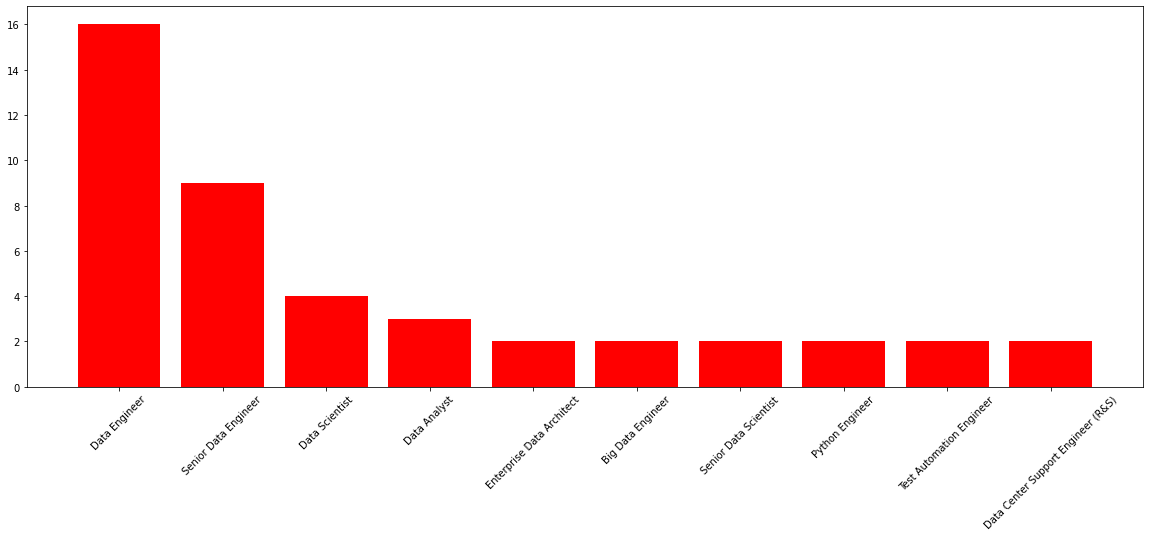

In [131]:
#wyświetlmy dane
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(zliczenie)
df = df[df.ilosc > 1].sort_values(by = ['ilosc'], ascending = False) #filtrujemy i sortujemy
plt.figure(figsize= (20,7)) #zmieniamy wymiar wykresu
plt.bar(df.pozycja, df.ilosc, color='red')
plt.xticks(rotation=45)
plt.show()

Zadanie - możemy spróbować pobrać wynagrodzenia